<a href="https://colab.research.google.com/github/ADITYA020704/CODTECH_INTERNSHIP-Task-1/blob/main/Task1_EDA_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK ONE: EXPLORATORY DATA ANALYSIS (EDA)**

---



*Start with a dataset of your choice and perform EDA using libraries like pandas, numpy,
and matplotlib or seaborn. Explore the data's characteristics, distributions, correlations,
and outliers. Visualize your findings with histograms, scatter plots, and heatmaps to
gain insights into the data.*




#**ABOUT DATASET-**
---
*The World Happiness Report is a landmark survey of the state of global happiness . The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.*
# SOURCE-
https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021/data

# STEP-1

---
Download the dataset.


In [209]:
!pip install kaggle --quiet
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
download_url="https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021"
od.download(download_url)

In [12]:
data_filename="/content/world-happiness-report-2021/world-happiness-report-2021.csv"

In [13]:
import pandas as pd

In [14]:
df=pd.read_csv(data_filename)

In [ ]:
df

# STEP-2 DATA PREPARATION & CLEANING.

---

*   Prepare the dataset.
*   Find the outliers.
*   Find missing values.
*   Fix or remove missing values.






In [ ]:
df.columns

In [ ]:
df.shape[0]

In [ ]:
df.isna().sum()

In [ ]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# STEP-3 EDA
---

WE WILL LOOK INTO THE FOLLOWING THINGS AND WILL FIND THE CORRELATIONS.
*   Ladder score.
*   GDP per capita.
*   Regions.
*   Life expectancy.
*   Social support.
*   Other aspects.




# **PART-1 In this question set we will deal with piechart,histogram and bargraphs.**


---








# Q-1 What is the %age distribution of different regions?
solution- In order to find out %age we made a piechart showing differnt regions.

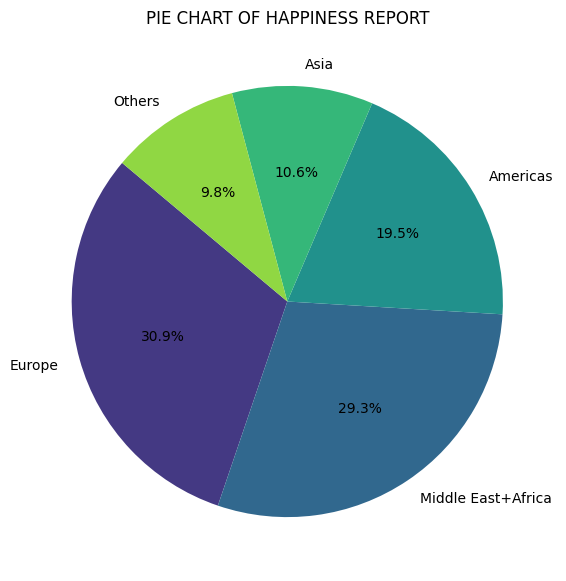

In [210]:
#PIE CHART FOR %DISTRIBUTION BY REGION
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Define a mapping for merging regions
region_mapping = {
    'Western Europe': 'Europe',
    'Central and Eastern Europe': 'Europe',
    'North America and ANZ': 'Americas',
    'Latin America and Caribbean': 'Americas',
    'Sub-Saharan Africa': 'Middle East+Africa',
    'Middle East and Northern Africa': 'Middle East+Africa',
    'SouthEast Asia': 'Asia',
'East Asia': 'Asia',
    'South Asia': 'Asia',
    'Commonwealth of Independent States': 'Others'
}
# Apply the mapping to the 'Region' column
df['Merged Region'] = df['Regional indicator'].map(region_mapping)

# Count the number of occurrences of each merged region
region_counts = df['Merged Region'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(region_counts)))

plt.title('PIE CHART OF HAPPINESS REPORT')
plt.show()


# Q-2a Top 10 most happiest and least happiest countries?
# Q-2b Most & least happy country based on the region?
---
solution(2a)- we made bar graph for top and bottom 10 countries.

solution(2b)- we made a bar graph based on differnt regions.


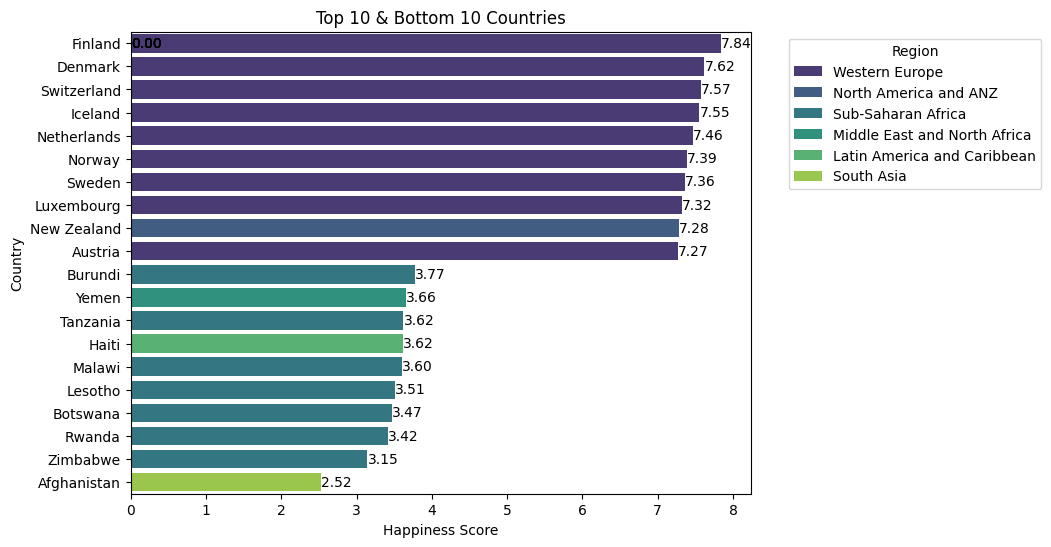

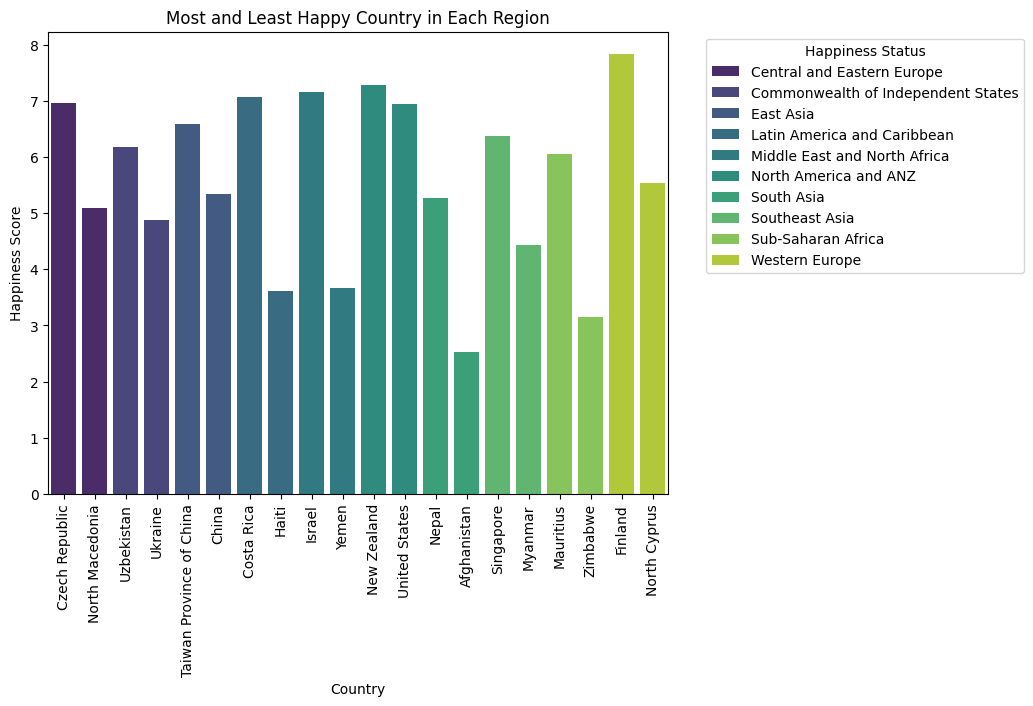

In [211]:
#SOLUTION 2A
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the dataset by happiness score
df_sorted = df.sort_values(by='Ladder score', ascending=False)

# Select the top 10 happiest countries
top_10 = df_sorted.head(10)

# Select the bottom 10 happiest countries
bottom_10 = df_sorted.tail(10)

# Combine top and bottom 10 into one DataFrame
top_bottom_10 = pd.concat([top_10, bottom_10])

# Create a bar plot
plt.figure(figsize=(8, 6))
ax=sns.barplot(data=top_bottom_10, x='Ladder score', y='Country name', hue='Regional indicator', dodge=False, palette='viridis')
for p in ax.patches:
    width = p.get_width()
    ax.text(p.get_x() + width , p.get_y() + p.get_height()/2, '{:1.2f}'.format(width), va="center")
plt.title('Top 10 & Bottom 10 Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
#END

#SOLUTION 2B
combined_df['Happiness Status'] = ['Most Happy'] * len(most_happy_df) + ['Least Happy'] * len(least_happy_df)

# Sort the combined DataFrame by region and then by happiness status to ensure no gaps within regions
combined_df = combined_df.sort_values(by=['Regional indicator', 'Happiness Status'], ascending=[True, False])

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=combined_df, x='Country name', y='Ladder score',dodge=False, hue='Regional indicator', palette='viridis')

plt.title('Most and Least Happy Country in Each Region')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=90)
plt.legend(title='Happiness Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Q-3 What is distribution of happiness score looks like?
---
solution- we made a Histogram to show the distribution of happiness score.


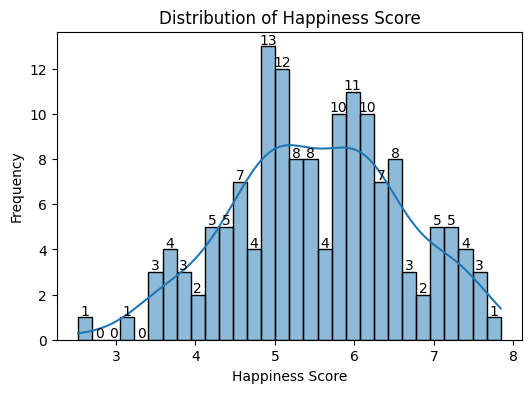

In [212]:
# Histogram of Happiness Score with values on top
plt.figure(figsize=(6, 4))
ax = sns.histplot(df['Ladder score'], bins=30, kde=True)
plt.title('Distribution of Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, '{:1.0f}'.format(height), ha="center")

plt.show()

# As one can observe that most countries scores lies between 5 & 6.
---
# SOME OTHER DISTRIBUTION SHOWN WITH THE HELP OF HISTOGRAM.



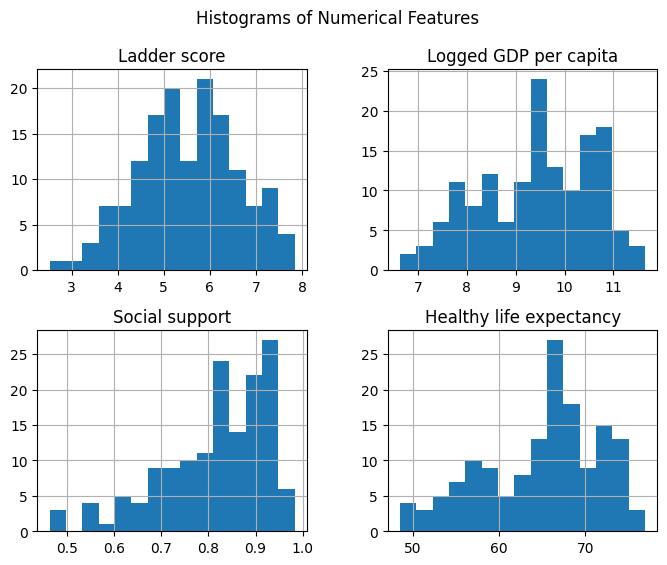

In [213]:
# 1. Histograms for numerical features
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
numerical_features = ['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy']
df[numerical_features].hist(figsize=(8, 6), bins=15)
plt.suptitle('Histograms of Numerical Features')
plt.show()


# Q-4 Happiness scores based on the regions?
---
solution- we made a bar graph by taking mean and median of happiness scores of different countries from same regions and compared with other regions.



<ipython-input-214-db2ce1461f22>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Ladder score', y='Regional indicator', palette='viridis',errorbar=None,dodge=False)


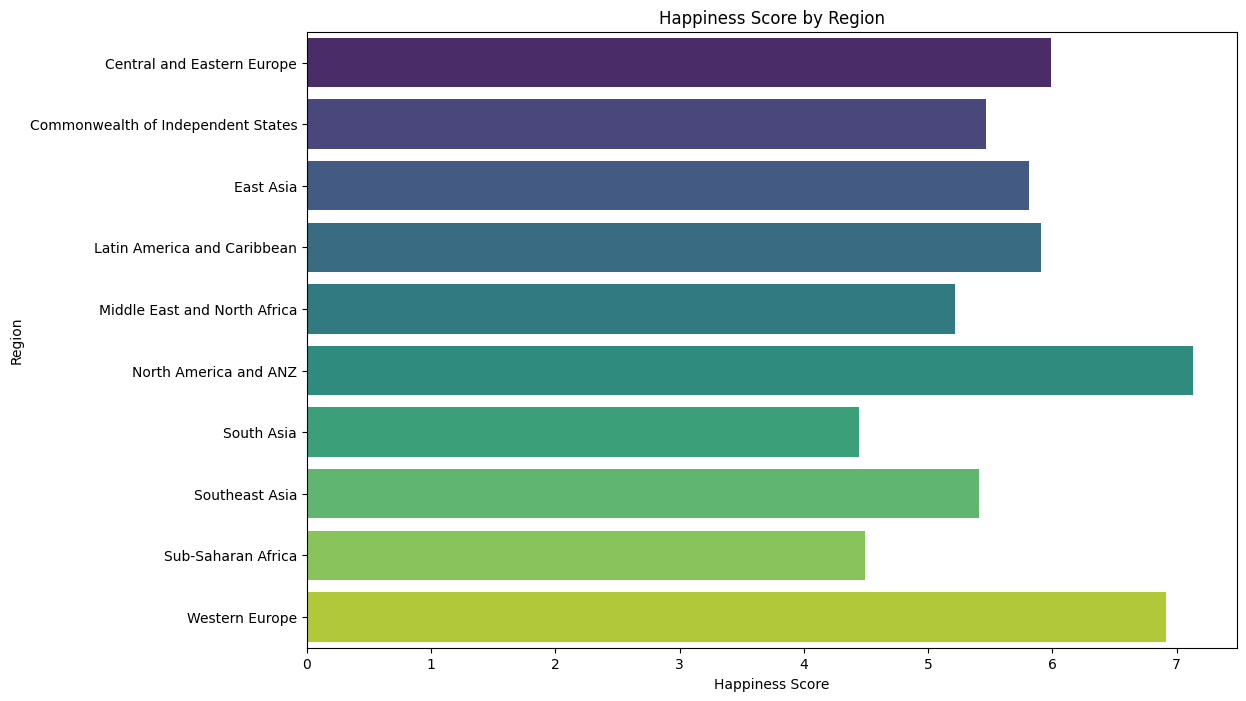

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Ladder score', y='Regional indicator', palette='viridis',errorbar=None,dodge=False)
plt.title('Happiness Score by Region')
plt.xlabel('Happiness Score')
plt.ylabel('Region')
plt.show()

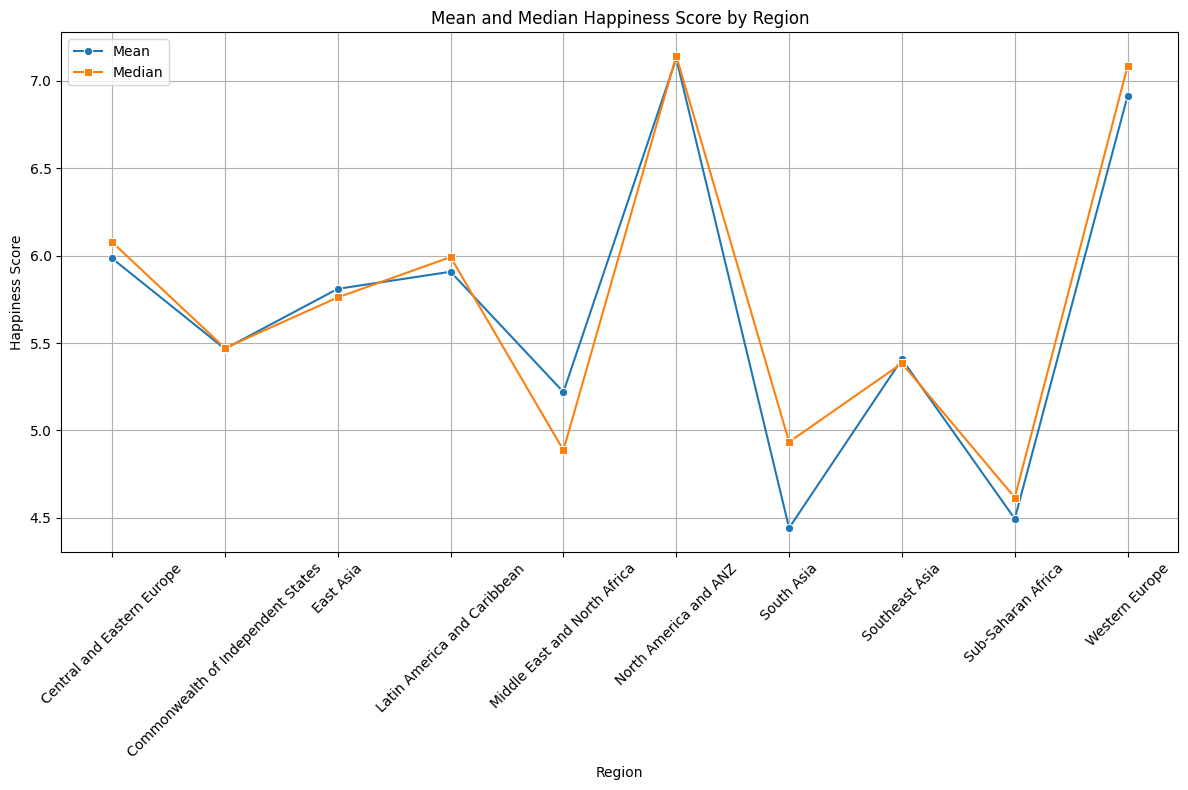

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset has multiple years of Happiness Score for each region
# Group by Region and calculate mean and median Happiness Score for each year
mean_scores_by_region = df.groupby('Regional indicator')['Ladder score'].mean()
median_scores_by_region = df.groupby('Regional indicator')['Ladder score'].median()


# Create a line plot
plt.figure(figsize=(12, 8))
# Remove sort_labels, it is not a valid argument for sns.lineplot()
sns.lineplot(data=mean_scores_by_region, marker='o', label='Mean')
sns.lineplot(data=median_scores_by_region, marker='s', label='Median')

plt.title('Mean and Median Happiness Score by Region')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# **PART-2 In this we will deal with scatter plots,Regression and Clustering.**

---




# Q-1 What is the relation between happiness score and GDP per capita?
---
Solution- With the help of scatterplots we found out that their is a positive correlation between GDP per capita and happiness scores.


                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     243.7
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           5.23e-33
Time:                        21:56:33   Log-Likelihood:                -148.73
No. Observations:                 149   AIC:                             301.5
Df Residuals:                     147   BIC:                             307.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.37

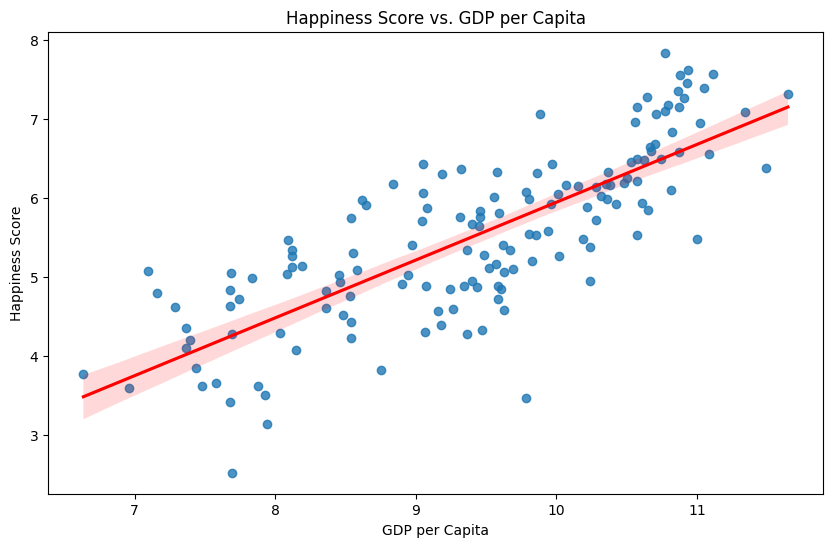

In [216]:
#REGRESSION ANALYSIS
import statsmodels.api as sm

# Prepare the data
X = df['Logged GDP per capita']
y = df['Ladder score']
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

# Plot the regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Logged GDP per capita', y='Ladder score', data=df, line_kws={'color': 'red'})
plt.title('Happiness Score vs. GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()


# Q-2 What is the relation between happiness score and healthy life expectancy?
---
Solution- we found out that their is positive correlation between happiness score and Healthy life expectancy by the help of scatter plot.


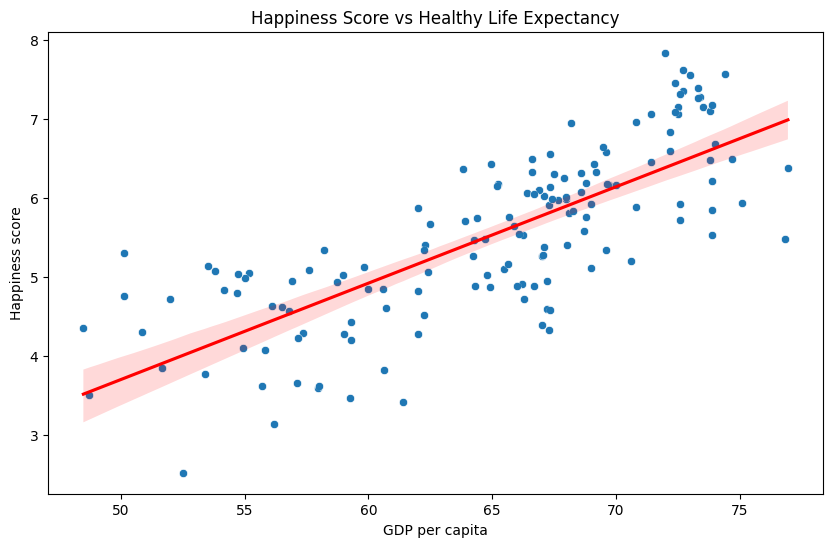

In [217]:
# Example: Happiness Score vs Healthy Life Expectancy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Healthy life expectancy', y='Ladder score')
sns.regplot(data=df, x='Healthy life expectancy', y='Ladder score', scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Happiness Score vs Healthy Life Expectancy')
plt.xlabel('GDP per capita')
plt.ylabel('Happiness score')
plt.show()

# Q-3 Does the positive correlation between per capita income and happiness score remains correct for different regions?
---
Solution- Yes it does, with the help of clustering technique we found out that it remains same(correct).


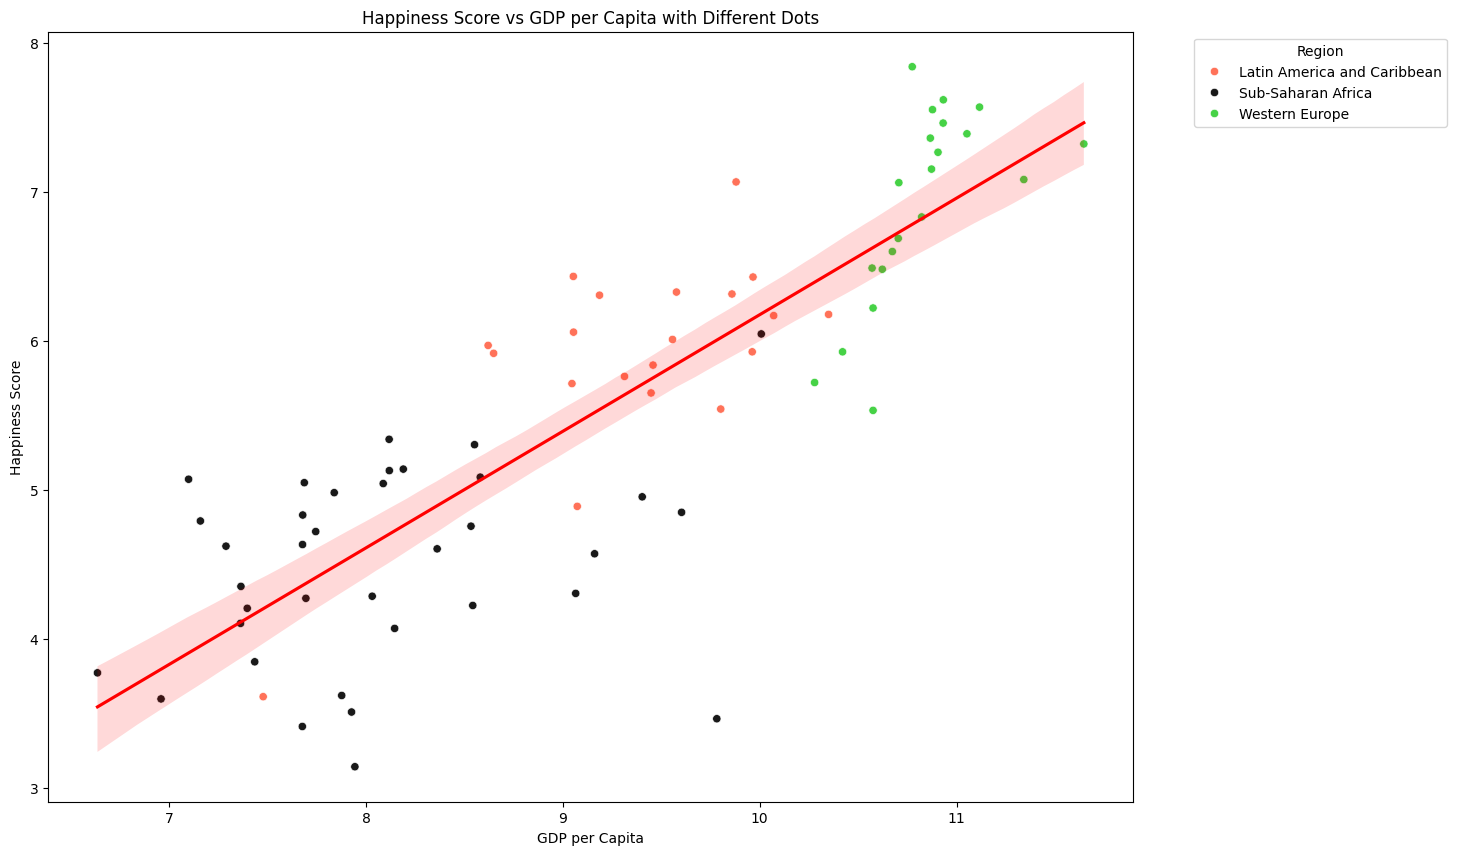

In [218]:
# Scatter plot: Happiness Score vs GDP per Capita
# Different colors for different regions and sizes based on Population
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Define the list of regions to include
regions_to_include = ['Western Europe', 'Sub-Saharan Africa', 'Latin America and Caribbean']
# Filter the dataset to include only the specified regions
filtered_df = df[df['Regional indicator'].isin(regions_to_include)]
# CUSTOM_PALETTE
custom_palette = ['#FF6347', '#000000', '#32CD32']

plt.figure(figsize=(14, 10))
sns.scatterplot(data=filtered_df, x='Logged GDP per capita', y='Ladder score',
                hue='Regional indicator',  alpha=0.9, palette=custom_palette) # Pass the list directly

# Add a linear trendline
sns.regplot(data=filtered_df, x='Logged GDP per capita', y='Ladder score', scatter=False, color='red')

plt.title('Happiness Score vs GDP per Capita with Different Dots')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#**PART-3 In this we will deal with heatmap,Hypothesis testing and Random forest technique.**

---



# Q- FInd the relation between multiple features and happiness score?
---
Solution-We made a heatmap to find correlation between multiple functions.


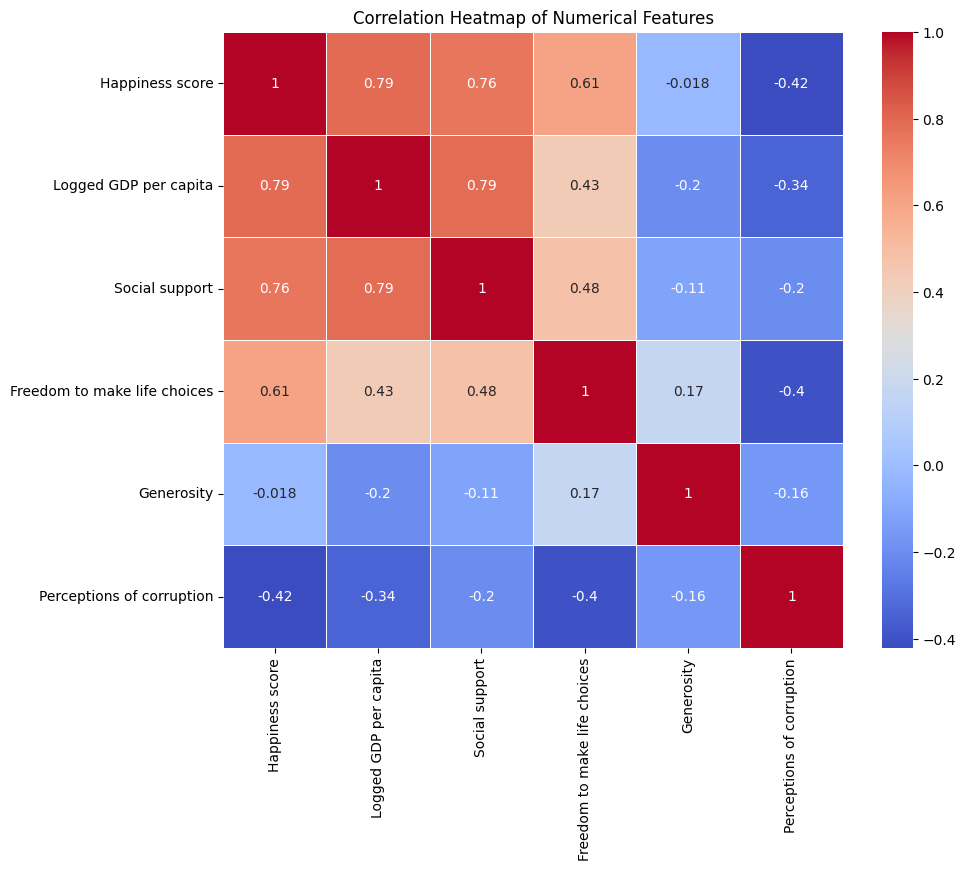

In [219]:
# 3. Heatmap to visualize correlations between numerical features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

# 'Ladder score' is now 'Happiness score' after renaming
numerical_features = ['Happiness score', 'Logged GDP per capita','Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Create a copy of the DataFrame and rename the column for correlation analysis
df_corr = df.copy()  # Create a copy to avoid modifying the original DataFrame
df_corr = df_corr.rename(columns={'Ladder score': 'Happiness score'})

correlation_matrix = df_corr[numerical_features].corr()  # Calculate correlation using the renamed column
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Q-2 Perform analysis to find out differences between-
*   (A)-Western Europe and Sub Sahara Africa.
*   (B)-Sub Sahara Africa and South Asia.
---
solution- we did hypothesis testing and find out


* (A)-The difference in happiness scores between the two regions is statistically significant. (West Europe and Sub sahara africa)  
*  (B)-The difference in happiness scores between the two regions is not statistically significant.(sub sahara africa and south asia)







In [220]:
from scipy.stats import ttest_ind

# Filter data for two regions
region1 = df[df['Regional indicator'] == 'Western Europe']['Ladder score']
region2 = df[df['Regional indicator'] == 'Sub-Saharan Africa']['Ladder score']

# Perform t-test
t_stat, p_value = ttest_ind(region1, region2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The difference in happiness scores between the two regions is statistically significant.")
else:
    print("The difference in happiness scores between the two regions is not statistically significant.")
#END
# Filter data for two regions
region3 = df[df['Regional indicator'] == 'South Asia']['Ladder score']
region4 = df[df['Regional indicator'] == 'Sub-Saharan Africa']['Ladder score']

# Perform t-test
t_stat, p_value = ttest_ind(region3, region4)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The difference in happiness scores between the two regions is statistically significant.")
else:
    print("The difference in happiness scores between the two regions is not statistically significant.")


T-statistic: 13.447891165523407
P-value: 4.987207977000854e-19
The difference in happiness scores between the two regions is statistically significant.
T-statistic: -0.17826060265007776
P-value: 0.8593962106918946
The difference in happiness scores between the two regions is not statistically significant.


# Q-3 Which Feature is the most important in Predicting happiness score?
---
Solution- With the help of ML_random-forrest_model,we found out social support followed by per capita income are most important measures.  



Mean Squared Error: 0.4280624740733337
Healthy life expectancy         0.364153
Social support                  0.316452
Logged GDP per capita           0.167871
Freedom to make life choices    0.076660
Perceptions of corruption       0.039843
Generosity                      0.035021
dtype: float64


<ipython-input-221-decf71cbf0c4>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')


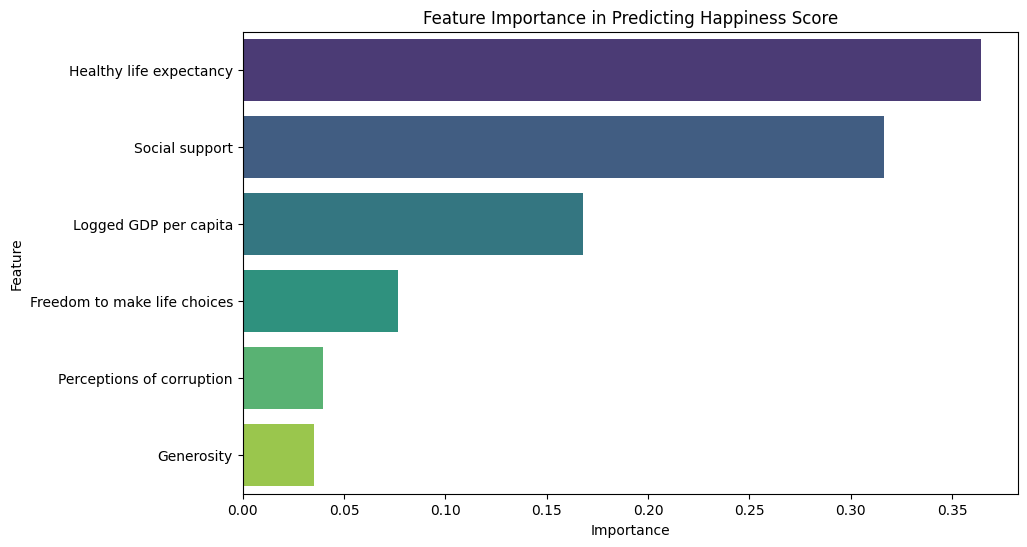

In [221]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
features = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
X = df[features]
y = df['Ladder score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Feature importance
feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance in Predicting Happiness Score')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


#                          **THANK_YOU**

---

